## Model 2 For Coivd-19 Data

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import os
import seaborn

In [2]:
# Get current working directory
print(os.getcwd())

C:\Users\I SEE YOU\Documents\Covid-CountModel


In [3]:
# Read in the data
usa_covid = pd.read_csv("Data/usa_covid_cases.csv")
# get rid of the index column (optional)
usa_covid.reset_index(drop=True, inplace=True)

print(usa_covid.shape)

(399, 59)


In [4]:
# Organize usa_covid to have only:
# the date, new cases, and icu patients columns
usa_covid_subset = usa_covid[['date', 'new_cases', 'icu_patients']]
print(usa_covid_subset)

           date  new_cases  icu_patients
0    2020-01-22        NaN           NaN
1    2020-01-23        0.0           NaN
2    2020-01-24        1.0           NaN
3    2020-01-25        0.0           NaN
4    2020-01-26        3.0           NaN
..          ...        ...           ...
394  2021-02-19   106355.0           NaN
395  2021-02-20    71510.0           NaN
396  2021-02-21    56495.0           NaN
397  2021-02-22    56044.0           NaN
398  2021-02-23    71436.0           NaN

[399 rows x 3 columns]


In [5]:
# Check for Nas
print("# of NAs in date: ", usa_covid_subset['date'].isna().sum())
print("# of NAs in new_cases: ", usa_covid_subset['new_cases'].isna().sum())
print("# of NAs in icu_patient: ",usa_covid_subset['icu_patients'].isna().sum())

# of NAs in date:  0
# of NAs in new_cases:  1
# of NAs in icu_patient:  69


In [6]:
# Now I have the final data to use for model 2
final_covid_df = usa_covid_subset.dropna()
print(final_covid_df)

           date  new_cases  icu_patients
64   2020-03-26    17856.0        1299.0
65   2020-03-27    18690.0        1792.0
66   2020-03-28    19630.0        2174.0
67   2020-03-29    18899.0        2456.0
68   2020-03-30    22075.0        3087.0
..          ...        ...           ...
389  2021-02-14    64956.0       14047.0
390  2021-02-15    53977.0       13799.0
391  2021-02-16    62470.0       13616.0
392  2021-02-17    69829.0       13103.0
393  2021-02-18    69266.0       13045.0

[330 rows x 3 columns]


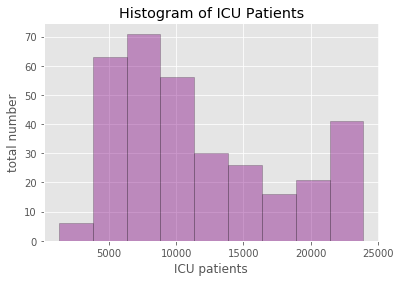

In [7]:
# histogram plot of ICU patients 
seaborn.distplot(final_covid_df['icu_patients'],kde=False, color = "purple", hist_kws={'edgecolor': 'black'}
                ).set(xlabel='ICU patients', ylabel= 'total number', title='Histogram of ICU Patients')
plt.show()

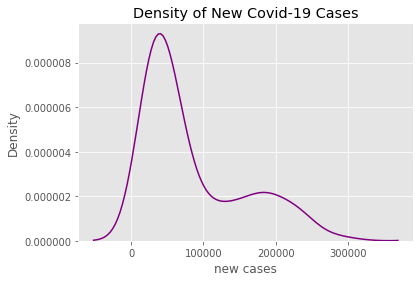

In [8]:
seaborn.distplot(final_covid_df['new_cases'], hist = False, color = 'purple'
                ).set(title='Density of New Covid-19 Cases', ylabel='Density', xlabel='new cases')
plt.show()

## Model 2 Specifications
Let $y_i$ be the count of new covid-19 cases for day $i$ and let $c_i$ be the ICU patient count for day $i$. I assume that $y_i \sim \text{Bin}(N_i,\,\theta_i)$, which corresponds to $y_i$ the observed count of new covid-19 cases, out of a population of $N_i$ new covid-19 cases. The probability of observing a new covid-19 case is $\theta_i$. Unforunately, $N_i$ is not known. So, I assume that $N_i \sim \text{Pois}(\lambda_{i}c_i)$. To complete the model I assume that $\lambda_i \sim \text{Ga}(\alpha_\lambda\,,\beta_\lambda)$ and that $\theta_i \sim \text{Be}(1,\beta_\theta)$. Thus, the joint posterior is:
\begin{align*}
p(N_i,\lambda_i,\theta_i|y_i) &\propto \prod_{i=1}^n f(y_i|N_i,\theta_i)\, \pi(N_i|\lambda_{i}c_i)\, \pi(\lambda_i|\alpha_\lambda,\beta_\lambda)\,\pi(\theta_i|\beta_\theta) \\
&\propto \prod_{i=1}^n \frac{N_i!}{y_i!(N_i-y_i!)}\theta_i^{y_i}(1-\theta_i)^{N_i - y_i}\frac{(\lambda_{i}c_i)^{N_i}\text{exp}(-\lambda_{i} c_i) }{N_{i}!} \frac{\beta_{\lambda}^{\alpha_\lambda}}{\Gamma(\alpha_\lambda)}\lambda_{i}^{\alpha_\lambda - 1}\text{exp}(-\lambda_i \beta_\lambda)\frac{(1-\theta_i)^{\beta_{\theta}-1}}{\text{B}(1,\beta_\theta)} \\
&\propto \prod_{i=1}^n \frac{1}{y_i!(N_i-y_i!)}\theta_i^{y_i}(1-\theta_i)^{N_i - y_i}(\lambda_{i}c_i)^{N_i}\text{exp}(-\lambda_{i} c_i) \lambda_{i}^{\alpha_\lambda - 1}\text{exp}(-\lambda_i \beta_\lambda)(1-\theta_i)^{\beta_{\theta}-1}
\end{align*}

From this, I obtain the full conditionals:
\begin{align*}
(N_i|\cdot) 
\end{align*}